In [2]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import pickle
from torch.utils.data import TensorDataset, DataLoader
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# local imports
import dihedral_opt_program
from src.nn_training import Group, plot_schatten_norm_sums_and_loss, net_schatten_norm
from src.nn_training import g_net, conv_net, fc_net, relu_g_net, relu_conv_net, relu_fc_net
torch.__version__

'1.10.2'

In [3]:
def get_training_dataframes(experiment_name, force_train):
    if not force_train:
        try:
            with open(f'data/training/{experiment_name}.pickle', 'rb') as f:
                dfs = pickle.load(f)
        except:
            print('Will train before plotting.')
            dfs = {}  # if training has not been done yet
    else:
            print('Will train before plotting.')
            dfs = {}
    return dfs

def postprocess_fn(x):
    return x

Will train before plotting.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

preds: tensor([[  8.2776],
        [ 18.7512],
        [  9.1242],
        [ 10.9443],
        [  8.3939],
        [ 12.8541],
        [  7.6463],
        [  7.3837],
        [  7.5603],
        [  9.9528],
        [ -8.0236],
        [ -9.1929],
        [ -7.6044],
        [ -9.4861],
        [ -8.4868],
        [ -9.0231],
        [ -8.0025],
        [ -7.8057],
        [ -8.1305],
        [-11.0503]], grad_fn=<MmBackward0>)


  0%|          | 0/10000 [00:00<?, ?it/s]

preds: tensor([[  7.5255],
        [  7.8578],
        [ 10.8963],
        [  7.9075],
        [  7.9387],
        [  8.5296],
        [ 13.4018],
        [  8.5999],
        [ 14.4486],
        [  8.0358],
        [-17.2152],
        [-12.1547],
        [ -7.2983],
        [ -7.4519],
        [-11.4885],
        [ -7.6890],
        [-13.9212],
        [ -7.7493],
        [-12.7648],
        [ -9.4465]], grad_fn=<MmBackward0>)


  0%|          | 0/10000 [00:00<?, ?it/s]

preds: tensor([[  8.1145],
        [  7.8859],
        [  8.1065],
        [  8.8250],
        [  9.0893],
        [  8.8897],
        [  9.4536],
        [  7.1749],
        [ 11.1215],
        [ 10.8126],
        [ -9.0154],
        [ -9.6110],
        [ -7.4371],
        [ -8.6349],
        [ -8.4338],
        [ -7.6534],
        [ -8.5895],
        [ -7.7247],
        [-12.7649],
        [ -8.0713]], grad_fn=<MmBackward0>)
<class 'src.nn_training.relu_conv_net'> did not converge 0 times to get 3 successes.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

preds: tensor([[  8.8925],
        [ 10.0378],
        [  8.2984],
        [  8.4121],
        [  8.5081],
        [  8.5212],
        [  8.4492],
        [  8.3227],
        [  7.7078],
        [  8.9142],
        [ -8.3305],
        [-10.9461],
        [ -8.2004],
        [ -9.2961],
        [-10.1526],
        [ -8.0125],
        [-10.4808],
        [ -7.5972],
        [ -7.9018],
        [-12.3379]], grad_fn=<MmBackward0>)


  0%|          | 0/10000 [00:00<?, ?it/s]

preds: tensor([[  8.3066],
        [  8.5198],
        [  8.5129],
        [  7.7494],
        [ 10.7319],
        [  8.0189],
        [  7.4743],
        [  7.4040],
        [ 12.5048],
        [ 10.0481],
        [-15.7773],
        [ -8.4268],
        [ -7.6474],
        [ -8.2352],
        [-12.2451],
        [ -7.7692],
        [-11.9197],
        [ -7.7063],
        [ -7.7973],
        [-11.4544]], grad_fn=<MmBackward0>)


  0%|          | 0/10000 [00:00<?, ?it/s]

preds: tensor([[ 12.1785],
        [  8.0251],
        [  8.0249],
        [  8.0374],
        [  7.6426],
        [  8.2821],
        [ 11.0739],
        [  8.3101],
        [  7.9336],
        [  8.6998],
        [-11.4481],
        [-10.0124],
        [ -8.2295],
        [ -8.3161],
        [ -9.3582],
        [ -7.3713],
        [ -9.2531],
        [ -7.2813],
        [ -8.7689],
        [ -7.8988]], grad_fn=<MmBackward0>)
<class 'src.nn_training.relu_g_net'> did not converge 0 times to get 3 successes.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

preds: tensor([[ 7.7661],
        [ 8.0578],
        [ 8.5821],
        [ 7.9090],
        [ 7.2283],
        [ 7.0771],
        [ 7.3268],
        [ 7.7592],
        [ 6.7557],
        [ 7.6307],
        [-7.3747],
        [-7.7876],
        [-7.0026],
        [-8.0936],
        [-8.0816],
        [-7.3046],
        [-7.3358],
        [-7.3489],
        [-6.9055],
        [-8.3480]], grad_fn=<MmBackward0>)


  0%|          | 0/10000 [00:00<?, ?it/s]

preds: tensor([[ 8.2601],
        [ 8.0258],
        [ 8.0279],
        [ 7.9191],
        [ 7.2197],
        [ 7.8972],
        [ 7.5312],
        [ 7.6875],
        [ 6.8186],
        [ 7.5045],
        [-7.8901],
        [-8.8678],
        [-7.2660],
        [-7.8622],
        [-7.5550],
        [-6.5191],
        [-7.1949],
        [-7.1623],
        [-7.0348],
        [-8.7180]], grad_fn=<MmBackward0>)


  0%|          | 0/10000 [00:00<?, ?it/s]

preds: tensor([[ 7.6139],
        [ 7.8178],
        [ 8.5940],
        [ 7.4624],
        [ 7.2552],
        [ 8.0406],
        [ 6.8540],
        [ 7.5123],
        [ 7.1558],
        [ 8.0864],
        [-7.6378],
        [-7.7045],
        [-7.1483],
        [-7.5969],
        [-7.6034],
        [-7.6515],
        [-6.9671],
        [-7.3221],
        [-7.1225],
        [-8.2472]], grad_fn=<MmBackward0>)
<class 'src.nn_training.relu_fc_net'> did not converge 0 times to get 3 successes.


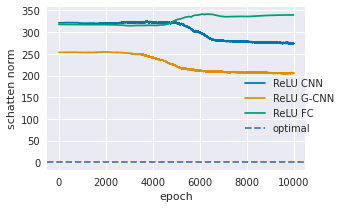

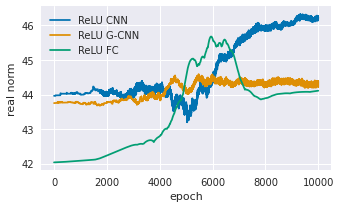

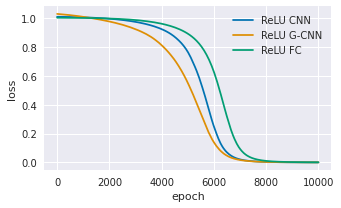

CPU times: user 51min 48s, sys: 1h 59min 29s, total: 2h 51min 17s
Wall time: 18min 51s


In [4]:
%%time
experiment_name = "relu_d60_gaussian_10_sep"
group = Group('D60')
k = 10
ins_m = torch.randn([k, 60])
ins_p = torch.randn([k, 60])
ins = torch.cat([ins_m, ins_p])
outs_p = torch.Tensor([[-1]] * k)
outs_m = torch.Tensor([[1]] * k)
outs = torch.cat([outs_m, outs_p])
dataset = TensorDataset(ins, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))
N = 3 # average over trajectories
force_train = True

nets = {"ReLU CNN": relu_conv_net, "ReLU G-CNN": relu_g_net, "ReLU FC": relu_fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs, net = plot_schatten_norm_sums_and_loss(nets, group, dataloader, postprocess_fn,
                                       N, epochs=10000, cuda=False, dfs=dfs,
                                       exp_name=experiment_name,
                                       lr=5e-6)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)